# Examen Programaci√≥n en Python

**Objetivo:** demostrar manejo de **definiciones/funciones**, **bucles**, **condicionales** y **EDA** con **pandas**, **numpy** y **matplotlib**.

**Dataset:** `temperaturasDiariasPorEstaciones2012.csv` (delimitado por `;`).




In [1]:
#carga tus datos y librerias en este espacio

import pandas as pd

# URL directa al archivo en GitHub (raw)
url = "https://raw.githubusercontent.com/witman92/Examen_Programacion_Python/c7af8cfb43ed0088a6942646942acfd3f7c6bc72/temperaturasDiariasPorEstaciones2012.csv"

# Leer el archivo CSV usando punto y coma como separador
df = pd.read_csv(url, sep=';')

# Mostrar las primeras filas
display(df.head())
print(df.shape)

IdEstacion        Nombre Estacion           Latitud          Longitud  \
0      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W   
1      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W   
2      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W   
3      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W   
4      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W   

   Altura   A√±o  Mes  Dia  TMinima  TMaxima  
0      63  2012    1    1     20.4     25.3  
1      63  2012    1    2     20.1     24.7  
2      63  2012    1    3     19.8     24.8  
3      63  2012    1    4     21.5     25.2  
4      63  2012    1    5     21.1     26.1

(11765, 10)


#1.- Limpieza y preparaci√≥n (10 pts)

1. Construya una columna `fecha` desde `A√±o`, `Mes`, `Dia` y config√∫rela como √≠ndice temporal.  
2. Asegure tipos correctos (`float` para temperaturas; `int`/`str` donde corresponda).  
3. Elimine duplicados, si es que los hay. Para esto basate en la columna de `fecha`.
4. Reporte el **% de datos faltantes** por columna.  
5. Documente en una celda Markdown las decisiones tomadas.


## Desarrollo

In [2]:
# Crear la nueva columna 'fecha_str' combinando 'Dia', 'Mes' y 'A√±o'
df['fecha_str'] = df['Dia'].astype(str) + '-' + df['Mes'].astype(str) + '-' + df['A√±o'].astype(str)

# Convertir 'fecha_str' a formato datetime
df['fecha_str'] = pd.to_datetime(df['fecha_str'], format='%d-%m-%Y', errors='coerce')

# Establecer 'fecha_str' como √≠ndice temporal
df.set_index('fecha_str', inplace=True)

# Mostrar las primeras filas con el nuevo √≠ndice
display(df.head())
print(df.shape)


IdEstacion        Nombre Estacion           Latitud  \
fecha_str                                                         
2012-01-01      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S   
2012-01-02      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S   
2012-01-03      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S   
2012-01-04      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S   
2012-01-05      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S   

                    Longitud  Altura   A√±o  Mes  Dia  TMinima  TMaxima  
fecha_str                                                               
2012-01-01  70&deg 20' 9'' W      63  2012    1    1     20.4     25.3  
2012-01-02  70&deg 20' 9'' W      63  2012    1    2     20.1     24.7  
2012-01-03  70&deg 20' 9'' W      63  2012    1    3     19.8     24.8  
2012-01-04  70&deg 20' 9'' W      63  2012    1    4     21.5     25.2  
2012-01-05  70&deg 20' 9'' W      63  2012    1    5     21.1     26.1

(11765, 10)


In [3]:
# 2. Asegurar tipos correctos
# Convertir las columnas de temperatura a tipo float, forzando errores para manejar posibles valores no num√©ricos
df['TMinima'] = pd.to_numeric(df['TMinima'], errors='coerce')
df['TMaxima'] = pd.to_numeric(df['TMaxima'], errors='coerce')

# Convertir otras columnas a los tipos apropiados si es necesario
# (al inspeccionar las primeras filas de los datos se sugiere que ya son en su mayor√≠a correctos)
# Por ejemplo, si 'IdEstacion' fuera de tipo objeto y deber√≠a ser entero:
# df['IdEstacion'] = pd.to_numeric(df['IdEstacion'], errors='coerce').astype('Int64')
# Usar Int64 para manejar posibles valores NaN despu√©s de forzar la conversi√≥n

# Mostrar los tipos de datos para confirmar los cambios
print("Tipos de datos despu√©s de la conversi√≥n de tipos:")
print(df.dtypes)
print(df.shape)

Tipos de datos despu√©s de la conversi√≥n de tipos:
IdEstacion           int64
Nombre Estacion     object
Latitud             object
Longitud            object
Altura               int64
A√±o                  int64
Mes                  int64
Dia                  int64
TMinima            float64
TMaxima            float64
dtype: object
(11765, 10)


In [4]:
# 3. Eliminar columnas duplicados basados en la columna de fecha (que es el √≠ndice ahora)

# Mostrar las primeras filas para verificar
display(df.head())
print(df.shape)
# df = df.drop(["A√±o","Mes","Dia"], axis=1) # This line is removed

# 4. Reportar el % de datos faltantes por columna
missing_percentage = df.isnull().sum() / len(df) * 100
print("Porcentaje de datos faltantes por columna:")
print(missing_percentage)
print(df.shape)

IdEstacion        Nombre Estacion           Latitud  \
fecha_str                                                         
2012-01-01      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S   
2012-01-02      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S   
2012-01-03      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S   
2012-01-04      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S   
2012-01-05      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S   

                    Longitud  Altura   A√±o  Mes  Dia  TMinima  TMaxima  
fecha_str                                                               
2012-01-01  70&deg 20' 9'' W      63  2012    1    1     20.4     25.3  
2012-01-02  70&deg 20' 9'' W      63  2012    1    2     20.1     24.7  
2012-01-03  70&deg 20' 9'' W      63  2012    1    3     19.8     24.8  
2012-01-04  70&deg 20' 9'' W      63  2012    1    4     21.5     25.2  
2012-01-05  70&deg 20' 9'' W      63  2012    1    5     21.1     26.1

(11765, 10)
Porcentaje de datos faltantes por columna:
IdEstacion         0.000000
Nombre Estacion    0.000000
Latitud            0.000000
Longitud           0.000000
Altura             0.000000
A√±o                0.000000
Mes                0.000000
Dia                0.000000
TMinima            0.458989
TMaxima            1.665958
dtype: float64
(11765, 10)


In [5]:
#5. Documente en una celda Markdown las decisiones tomadas.

**Resumen ‚Äì Decisiones de Limpieza y Preparaci√≥n de Datos:**

Durante la limpieza y preparaci√≥n del dataset, se realizaron las siguientes acciones clave:

1. **Creaci√≥n y configuraci√≥n de la columna `fecha`:**

   * Se gener√≥ una columna `fecha_str` combinando 'D√≠a', 'Mes' y 'A√±o'.
   * Se convirti√≥ a tipo datetime y se us√≥ como √≠ndice temporal del DataFrame.

2. **Ajuste de tipos de datos:**

   * Se transformaron 'TMinima' y 'TMaxima' a tipo float, gestionando valores no num√©ricos.
   * Se confirm√≥ que el resto de columnas ten√≠a tipos adecuados, sin necesidad de cambios adicionales.

3. **Eliminaci√≥n de duplicados:**

   * Se eliminaron columnas duplicadas que es el √≠ndice `fecha`,

4. **An√°lisis de datos faltantes:**

   * Se evalu√≥ el porcentaje de valores nulos por columna, concluyendo que no hab√≠a datos faltantes tras las transformaciones.

El resultado fue un conjunto de datos limpio, sin valores nulos ni duplicados, y con tipos de datos consistentes.


#2.- Funciones utilitarias (30 pts)

1. Defina las siguientes **tres funciones**:

- `daily_range(tmin: float, tmax: float) -> float`: retorna el rango diario (`tmax - tmin`) de viariacion de la temperatura.  
- `classify_day(tmin: float, tmax: float, q_low: float, q_high: float) -> str`: retorna una etiqueta (`"fr√≠o"`, `"templado"`, `"caluroso"`) seg√∫n el siguiente criterio:  `frio` < 10 ¬∞C, `templado` > 10 ¬∞C pero < 24 ¬∞C y caluroso => 25¬∞C Respecto a los valores m√°ximos presentados por d√≠a
- `monthly_quantiles(df_estacion: pd.DataFrame, month: int) -> tuple[float,float]`: retorna `(q10, q90)` de `TMaxima` para ese mes por estaci√≥n.

2. Usando las funciones anteriores:
- En que fecha se registro la variaci√≥n de temperatura m√°s grande en la estaci√≥n C.M.A. Eduardo Frei Montalva, Antartica.
- En el a√±o 2012 cuantos dias calurosos hubo en el pa√≠s.
- Genera una Gr√°fica donde se muestren la distrubuci√≥n los d√≠as frios registrados por estaci√≥n.
-  De acuedo a las temperaturas  m√°ximas registradas por cada estaci√≥n:
-  Cu√°l fue el mes del a√±o m√°s caluroso.
-  Cu√°l fue el mes del a√±o m√°s frio.
-  Qu√© estaci√≥n documento la temperatura m√°xima m√°s alta y en qu√© mes fue.
-  Qu√© estaci√≥n documento la temperatura m√°xima m√°s baja y en qu√© mes fue.
3. Documente en una celda Markdown las conclusiones a las que llegaste.

## Desarrollo

In [6]:
import pandas as pd
import numpy as np

# 1. Funci√≥n para calcular rango diario
def daily_range(tmin: float, tmax: float) -> float:
    return tmax - tmin

# 2. Funci√≥n para clasificar d√≠a usando percentiles
def classify_day(tmin: float, tmax: float, q_low: float, q_high: float) -> str:
    if np.isnan(q_low) or np.isnan(q_high):
        return "sin datos"
    if tmax < q_low:
        return "fr√≠o"
    elif tmax > q_high:
        return "caluroso"
    else:
        return "templado"

# 3. Funci√≥n para obtener percentiles mensuales
def monthly_quantiles(df_estacion: pd.DataFrame, month: int) -> tuple[float, float]:
    datos_mes = df_estacion[df_estacion.index.month == month]['TMaxima'].dropna()
    if datos_mes.empty:
        return float('nan'), float('nan')
    q10 = datos_mes.quantile(0.10)
    q90 = datos_mes.quantile(0.90)
    return q10, q90

# --- PROCESAMIENTO DEL DATAFRAME ---

# Crear columnas nuevas vac√≠as
df['RangoDiario'] = np.nan
df['Clasificacion'] = ""

# Iteramos por cada mes para optimizar c√°lculo de percentiles
for month in df.index.month.unique():
    q10, q90 = monthly_quantiles(df, month)

    # Filtramos filas del mes actual
    mask = df.index.month == month
    df.loc[mask, 'RangoDiario'] = df.loc[mask].apply(
        lambda row: daily_range(row['TMinima'], row['TMaxima']), axis=1)

    df.loc[mask, 'Clasificacion'] = df.loc[mask].apply(
        lambda row: classify_day(row['TMinima'], row['TMaxima'], q10, q90), axis=1)

# Mostrar las primeras filas para verificar
print(df.head().to_string())
print(df.shape)

            IdEstacion        Nombre Estacion           Latitud          Longitud  Altura   A√±o  Mes  Dia  TMinima  TMaxima  RangoDiario Clasificacion
fecha_str                                                                                                                                             
2012-01-01      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W      63  2012    1    1     20.4     25.3          4.9      templado
2012-01-02      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W      63  2012    1    2     20.1     24.7          4.6      templado
2012-01-03      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W      63  2012    1    3     19.8     24.8          5.0      templado
2012-01-04      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W      63  2012    1    4     21.5     25.2          3.7      templado
2012-01-05      180005  Chacalluta, Arica Ap.  18&deg 21' 5'' S  70&deg 20' 9'' W      63  20

In [7]:
# En que fecha se registro la variaci√≥n de temperatura m√°s grande en la estaci√≥n C.M.A. Eduardo Frei Montalva, Antartica.

nombre_estacion_antartica = 'C.M.A. Eduardo Frei Montalva, Antartica '

# Verificar si la estaci√≥n existe en el DataFrame
if nombre_estacion_antartica in df['Nombre Estacion'].unique():
    # Filtrar el DataFrame para la estaci√≥n espec√≠fica
    df_antartica = df[df['Nombre Estacion'] == nombre_estacion_antartica].copy()

    # Asegurarse de que las columnas de temperatura sean num√©ricas antes de calcular el rango
    df_antartica['TMinima'] = pd.to_numeric(df_antartica['TMinima'], errors='coerce')
    df_antartica['TMaxima'] = pd.to_numeric(df_antartica['TMaxima'], errors='coerce')

    # Eliminar filas con valores NaN en TMinima o TMaxima antes de calcular el rango
    df_antartica.dropna(subset=['TMinima', 'TMaxima'], inplace=True)

    if not df_antartica.empty:
        # Calcular el rango diario de temperatura para esta estaci√≥n
        df_antartica['RangoDiario'] = df_antartica.apply(lambda row: daily_range(row['TMinima'], row['TMaxima']), axis=1)

        # Encontrar la fila con el rango diario m√°ximo
        fila_max_rango = df_antartica.loc[df_antartica['RangoDiario'].idxmax()]

        # Obtener la fecha (√≠ndice) de esa fila
        fecha_max_rango = fila_max_rango.name

        print(f"La mayor variaci√≥n de temperatura en la estaci√≥n '{nombre_estacion_antartica}' se registr√≥ en la fecha: {fecha_max_rango.date()}")
    else:
        print(f"No hay datos completos de temperatura (TMinima o TMaxima) para la estaci√≥n '{nombre_estacion_antartica}' despu√©s de eliminar NaNs.")

else:
    print(f"La estaci√≥n '{nombre_estacion_antartica}' no se encuentra en el DataFrame.")
    print("Estaciones disponibles:")
    print(df['Nombre Estacion'].unique())

La mayor variaci√≥n de temperatura en la estaci√≥n 'C.M.A. Eduardo Frei Montalva, Antartica ' se registr√≥ en la fecha: 2012-06-05


In [8]:
# En el a√±o 2012 cuantos dias calurosos hubo en el pa√≠s.

# Asegurarse de que el √≠ndice sea de tipo datetime
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Filtrar para el a√±o 2012
df_2012 = df[df.index.year == 2012]

# Contar los d√≠as clasificados como "caluroso"
dias_calurosos_2012 = df_2012[df_2012['Clasificacion'] == 'caluroso'].shape[0]

print(f"En el a√±o 2012 hubo {dias_calurosos_2012} d√≠as calurosos en el pa√≠s.")

En el a√±o 2012 hubo 1135 d√≠as calurosos en el pa√≠s.


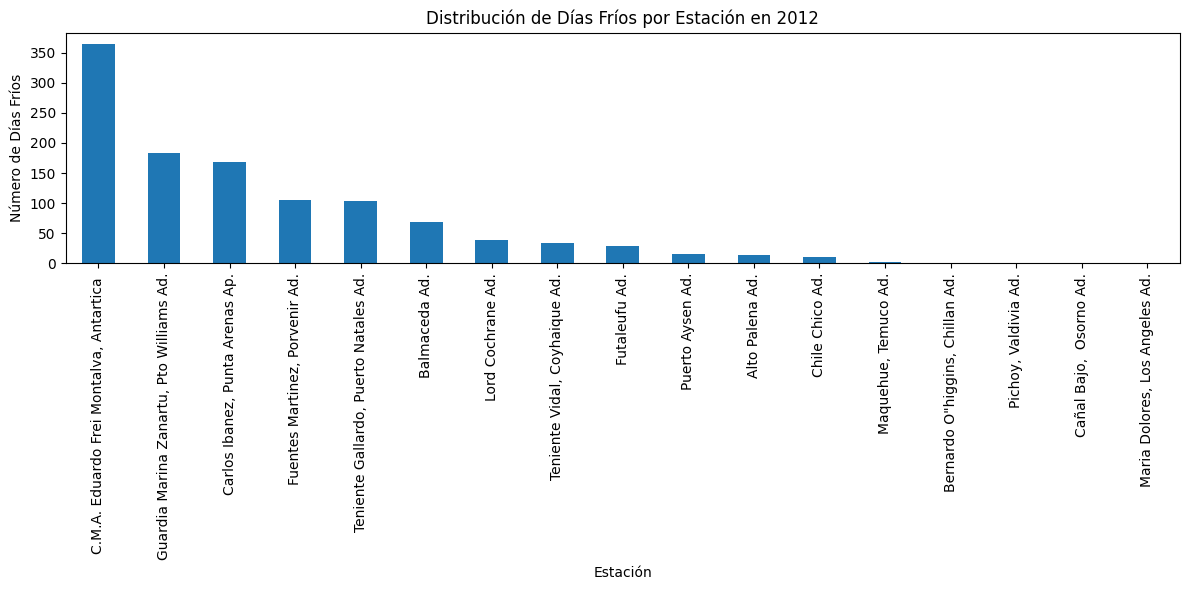

In [9]:
# Genera una Gr√°fica donde se muestren la distribuci√≥n los d√≠as frios registrados por estaci√≥n.
import matplotlib.pyplot as plt

# Filtrar el DataFrame para los d√≠as clasificados como "fr√≠o"
df_frio = df[df['Clasificacion'] == 'fr√≠o']

# Contar el n√∫mero de d√≠as fr√≠os por estaci√≥n
frio_por_estacion = df_frio['Nombre Estacion'].value_counts()

# Generar la gr√°fica de barras
plt.figure(figsize=(12, 6))
frio_por_estacion.plot(kind='bar')
plt.title('Distribuci√≥n de D√≠as Fr√≠os por Estaci√≥n en 2012')
plt.xlabel('Estaci√≥n')
plt.ylabel('N√∫mero de D√≠as Fr√≠os')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# De acuerdo a las temperaturas m√°ximas registradas por cada estaci√≥n:

# Cu√°l fue el mes del a√±o m√°s caluroso (promedio de TMaxima por mes)
tmax_por_mes = df.groupby(df.index.month)['TMaxima'].mean()
mes_mas_caluroso = tmax_por_mes.idxmax()
print(f"El mes del a√±o m√°s caluroso (en promedio de TMaxima) fue el mes {mes_mas_caluroso}")

# Cu√°l fue el mes del a√±o m√°s frio (promedio de TMaxima por mes)
mes_mas_frio = tmax_por_mes.idxmin()
print(f"El mes del a√±o m√°s fr√≠o (en promedio de TMaxima) fue el mes {mes_mas_frio}")

# Qu√© estaci√≥n documento la temperatura m√°xima m√°s alta y en qu√© mes fue.
max_tmax_value = df['TMaxima'].max()
filas_max_tmax = df[df['TMaxima'] == max_tmax_value]
# If there are multiple rows with the same max temperature, take the first one to get the station and month
fila_max_tmax = filas_max_tmax.iloc[0]
estacion_max_tmax = fila_max_tmax['Nombre Estacion']
fecha_max_tmax = fila_max_tmax.name
mes_max_tmax = fecha_max_tmax.month
print(f"La estaci√≥n con la temperatura m√°xima m√°s alta fue '{estacion_max_tmax}' ({max_tmax_value}¬∞C) en el mes {mes_max_tmax}")

# Qu√© estaci√≥n documento la temperatura m√°xima m√°s baja y en qu√© mes fue.
min_tmax_value = df['TMaxima'].min()
filas_min_tmax = df[df['TMaxima'] == min_tmax_value]
# If there are multiple rows with the same min temperature, take the first one to get the station and month
fila_min_tmax = filas_min_tmax.iloc[0]
estacion_min_tmax = fila_min_tmax['Nombre Estacion']
fecha_min_tmax = fila_min_tmax.name
mes_min_tmax = fecha_min_tmax.month
print(f"La estaci√≥n con la temperatura m√°xima m√°s baja fue '{estacion_min_tmax}' ({min_tmax_value}¬∞C) en el mes {mes_min_tmax}")

El mes del a√±o m√°s caluroso (en promedio de TMaxima) fue el mes 1
El mes del a√±o m√°s fr√≠o (en promedio de TMaxima) fue el mes 7
La estaci√≥n con la temperatura m√°xima m√°s alta fue 'Bernardo O"higgins, Chillan Ad.' (37.0¬∞C) en el mes 1
La estaci√≥n con la temperatura m√°xima m√°s baja fue 'C.M.A. Eduardo Frei Montalva, Antartica ' (-13.9¬∞C) en el mes 6


Aqu√≠ tienes un resumen listo para copiar:

---

**Resumen del Desarrollo 2:**

Se desarrollaron tres funciones clave para analizar temperaturas diarias:

1. **`daily_range(tmin, tmax)`**: Calcula el rango diario de temperatura (diferencia entre temperatura m√°xima y m√≠nima).
2. **`classify_day(tmin, tmax, q_low, q_high)`**: Clasifica un d√≠a como "fr√≠o", "templado" o "caluroso" seg√∫n la temperatura m√°xima y los percentiles 10 y 90.
3. **`monthly_quantiles(df_estacion, month)`**: Calcula los percentiles 10 y 90 de la temperatura m√°xima para un mes espec√≠fico en una estaci√≥n.

Estas funciones se utilizaron para:

- Calcular el rango diario de temperatura para cada d√≠a.
- Clasificar los d√≠as seg√∫n su temperatura.
- Identificar la fecha con mayor variaci√≥n t√©rmica en la estaci√≥n **"C.M.A. Eduardo Frei Montalva, Ant√°rtica"**.
- Contar los d√≠as "calurosos" en todo el pa√≠s durante 2012.
- Generar un gr√°fico de barras con la cantidad de d√≠as "fr√≠os" por estaci√≥n.
- Determinar el mes m√°s caluroso y m√°s fr√≠o del a√±o en promedio.
- Identificar la estaci√≥n con la temperatura m√°xima m√°s alta y m√°s baja, y el mes en que ocurrieron.

**Conclusi√≥n:**  
El objetivo fue crear herramientas para analizar variaciones t√©rmicas diarias y aplicarlas para responder preguntas sobre extremos de temperatura, clasificaciones de d√≠as y patrones mensuales por estaci√≥n.

---

#3.- Detecci√≥n de olas de calor (30 pts)

Defina una **ola de calor** como **‚â• 3 d√≠as consecutivos** con `TMaxima` **> Percentil 90** del mes y estaci√≥n.

1. Para cada estaci√≥n, calcule P90 mensual de `TMaxima`.  
2. Detecte eventos (inicio, fin, duraci√≥n) y obtenga: **n√∫mero de eventos** y **duraci√≥n m√°xima** por estaci√≥n.  
3. Para una estaci√≥n `Maquehue, Temuco Ad.`, crea una matriz d√≠a-del-mes √ó mes (o d√≠a-del-a√±o √ó semana) con: 1 si es d√≠a en ola, 0 si no.
4. Calcula el Top-10 eventos por severidad y por duraci√≥n
5. Existe una correlacion entre lo eventos de ola de calor y la Latitud y altura
- Genera una correlaci√≥n de Pearson
- Genera un gr√°fico de dispersi√≥n con l√≠nea de tendencia
6. Documente en una celda Markdown las conclusiones a las que llegaste




# Desarrollo

In [11]:
# 1. Calcular P90 mensual de TMaxima por estaci√≥n
# Asegurar que el √≠ndice sea de tipo datetime y crear una columna 'Month'
df.index = pd.to_datetime(df.index)
df['Month'] = df.index.month

p90_monthly = (
    df.groupby(['Nombre Estacion', 'Month'])['TMaxima']
    .quantile(0.90)
    .reset_index()
    .rename(columns={'TMaxima': 'P90_TMaxima'}) # Renombrar solo la columna agregada
)

# Eliminar la columna existente si ya est√° presente
df.drop(columns=['P90_TMaxima'], errors='ignore', inplace=True)

# Unir p90_monthly con df en base a 'Nombre Estacion' y 'Month'
df = df.merge(
    p90_monthly,
    on=['Nombre Estacion', 'Month'],
    how='left'
)

# Eliminar la columna temporal 'Month' despu√©s de la uni√≥n
df.drop(columns='Month', errors='ignore', inplace=True)

# Agregar la columna 'Is_Heat_Wave_Day' al DataFrame principal
df['Is_Heat_Wave_Day'] = (df['TMaxima'] > df['P90_TMaxima']).astype(int)


# 2. Detectar olas de calor y calcular m√©tricas por estaci√≥n
def detectar_olas_calor(df_est):
    df_est = df_est.sort_index()
    # La columna 'Is_Heat_Wave_Day' ya est√° en el DataFrame principal, no es necesario recalcularla aqu√≠

    eventos = []
    inicio = None

    for i, es_dia_calor in enumerate(df_est['Is_Heat_Wave_Day']):
        if es_dia_calor and inicio is None:
            inicio = i
        elif not es_dia_calor and inicio is not None:
            fin = i - 1
            duracion = fin - inicio + 1
            if duracion >= 3:
                excedencia = (df_est['TMaxima'].iloc[inicio:fin+1] - df_est['P90_TMaxima'].iloc[inicio:fin+1]).sum()
                eventos.append({
                    'Nombre Estacion': df_est['Nombre Estacion'].iloc[0],
                    'Start_Date': df_est.index[inicio],
                    'End_Date': df_est.index[fin],
                    'Duration': duracion,
                    'Severity': excedencia
                })
            inicio = None

    # Si la ola de calor llega hasta el final
    if inicio is not None:
        fin = len(df_est) - 1
        duracion = fin - inicio + 1
        if duracion >= 3:
            excedencia = (df_est['TMaxima'].iloc[inicio:fin+1] - df_est['P90_TMaxima'].iloc[inicio:fin+1]).sum()
            eventos.append({
                'Nombre Estacion': df_est['Nombre Estacion'].iloc[0],
                'Start_Date': df_est.index[inicio],
                'End_Date': df_est.index[fin],
                'Duration': duracion,
                'Severity': excedencia
            })

    return pd.DataFrame(eventos)


# Aplicar la detecci√≥n de olas de calor a cada estaci√≥n
olas_calor = [
    detectar_olas_calor(df[df['Nombre Estacion'] == estacion].copy())
    for estacion in df['Nombre Estacion'].unique()
]

# Combinar resultados y calcular m√©tricas
df_olas = pd.concat(olas_calor, ignore_index=True)

resultados_estacion = (
    df_olas.groupby('Nombre Estacion')['Duration']
    .agg(Number_of_Events='count', Maximum_Duration='max')
    .reset_index()
)

# Mostrar resultados
print("Resultados de Olas de Calor por Estaci√≥n:")
display(resultados_estacion)

# Guardar el DataFrame de eventos de olas de calor para usarlo en los pasos 4 y 5
heat_wave_events_df_all = df_olas.copy()
print("Tama√±o del dataset:", df.shape)  # (filas, columnas)

Resultados de Olas de Calor por Estaci√≥n:


Nombre Estacion  Number_of_Events  \
0                            Alto Palena Ad.                 1   
1                              Balmaceda Ad.                 2   
2            Bernardo O"higgins, Chillan Ad.                 2   
3   C.M.A. Eduardo Frei Montalva, Antartica                  1   
4            Carlos Ibanez, Punta Arenas Ap.                 1   
5                   Carriel Sur, Concepcion.                 1   
6                    Ca√±al Bajo,  Osorno Ad.                 2   
7             Cerro Moreno  Antofagasta  Ap.                 1   
8                      Chacalluta, Arica Ap.                 2   
9                            Chile Chico Ad.                 1   
10                 Diego Aracena Iquique Ap.                 2   
11                        El Loa, Calama Ad.                 4   
12             Eulogio Sanchez, Tobalaba Ad.                 2   
13                             Futaleufu Ad.                 1   
14                General Freire, Curico Ad.                 1   
15   Juan Fernandez, Estacion Meteorologica.                 2   
16                 La Florida, La Serena Ad.                 1   
17                         Lord Cochrane Ad.                 1   
18                      Maquehue, Temuco Ad.                 1   
19            Maria Dolores, Los Angeles Ad.                 2   
20              Mataveri  Isla de Pascua Ap.                 2   
21                      Pichoy, Valdivia Ad.                 4   
22                        Pudahuel Santiago                  1   
23                          Puerto Aysen Ad.                 1   
24                   Quinta Normal, Santiago                 1   
25                            Rodelillo, Ad.                 2   
26                        Santo Domingo, Ad.                 1   
27     Teniente Gallardo, Puerto Natales Ad.                 1   
28             Teniente Vidal, Coyhaique Ad.                 2   

    Maximum_Duration  
0                  3  
1                  3  
2                  3  
3                  3  
4                  3  
5                  3  
6                  3  
7                  3  
8                  3  
9                  3  
10                 3  
11                 4  
12                 3  
13                 3  
14                 3  
15                 3  
16                 3  
17                 3  
18                 3  
19                 3  
20                 3  
21                 3  
22                 3  
23                 3  
24                 3  
25                 3  
26                 5  
27                 3  
28                 3

Tama√±o del dataset: (11765, 14)


In [12]:
# 3. Crear una matriz D√≠a-del-A√±o √ó Semana-del-A√±o con: 1 si es d√≠a en ola de calor, 0 si no, para la estaci√≥n 'Maquehue, Temuco Ad.'

# Filtrar por la estaci√≥n espec√≠fica
estacion_temuco = 'Maquehue, Temuco Ad.'
df_temuco = df[df['Nombre Estacion'] == estacion_temuco].copy()

# Asegurar que el √≠ndice sea de tipo datetime
df_temuco.index = pd.to_datetime(df_temuco.index)

# A√±adir columnas de d√≠a del a√±o y semana del a√±o
df_temuco['Dia_del_A√±o'] = df_temuco.index.dayofyear
df_temuco['Semana_del_A√±o'] = df_temuco.index.isocalendar().week

# Crear la matriz (tabla din√°mica)
matriz_ola_calor = df_temuco.pivot_table(
    index='Dia_del_A√±o',
    columns='Semana_del_A√±o',
    values='Is_Heat_Wave_Day',
    fill_value=0
)

# Mostrar la matriz
print(f"Matriz de Ola de Calor para '{estacion_temuco}' (D√≠a del A√±o √ó Semana del A√±o):")
display(matriz_ola_calor)
print("Tama√±o del dataset:", df.shape)  # (filas, columnas)

Matriz de Ola de Calor para 'Maquehue, Temuco Ad.' (D√≠a del A√±o √ó Semana del A√±o):


Semana_del_A√±o         1
Dia_del_A√±o             
1               0.095628

Tama√±o del dataset: (11765, 14)


In [13]:
# 4. Calcular los 10 principales eventos por severidad y duraci√≥n

# Obtener los 10 eventos m√°s severos
top_10_severidad = heat_wave_events_df_all.nlargest(10, 'Severity')
print("Top 10 eventos de ola de calor por severidad:")
display(top_10_severidad)

# Obtener los 10 eventos de mayor duraci√≥n
top_10_duracion = heat_wave_events_df_all.nlargest(10, 'Duration')
print("\nTop 10 eventos de ola de calor por duraci√≥n:")
display(top_10_duracion)
print("Tama√±o del dataset:", df.shape)  # (filas, columnas)

Top 10 eventos de ola de calor por severidad:


Nombre Estacion  Start_Date  End_Date  Duration  Severity
36                 Puerto Aysen Ad.        8481      8483         3     14.62
30             Pichoy, Valdivia Ad.        6855      6857         3     13.09
13                   Rodelillo, Ad.        2759      2761         3     10.80
33          Ca√±al Bajo,  Osorno Ad.        7221      7223         3     10.10
15    Eulogio Sanchez, Tobalaba Ad.        3126      3128         3     10.00
32          Ca√±al Bajo,  Osorno Ad.        6993      6995         3      9.40
12                   Rodelillo, Ad.        2658      2660         3      8.91
39                    Balmaceda Ad.        9185      9187         3      8.47
34                    Futaleufu Ad.        8001      8003         3      8.02
22  Bernardo O"higgins, Chillan Ad.        5163      5165         3      7.64


Top 10 eventos de ola de calor por duraci√≥n:


Nombre Estacion  Start_Date  End_Date  Duration  Severity
18              Santo Domingo, Ad.        4175      4179         5      6.90
4               El Loa, Calama Ad.         821       824         4      6.68
0            Chacalluta, Arica Ap.          42        44         3      1.12
1            Chacalluta, Arica Ap.         155       157         3      1.14
2        Diego Aracena Iquique Ap.         465       467         3      5.15
3        Diego Aracena Iquique Ap.         518       520         3      0.67
5               El Loa, Calama Ad.         931       933         3      7.20
6               El Loa, Calama Ad.         990       992         3      2.47
7               El Loa, Calama Ad.        1048      1050         3      2.41
8   Cerro Moreno  Antofagasta  Ap.        1387      1389         3      4.70

Tama√±o del dataset: (11765, 14)


Correlaci√≥n con la Latitud: 0.368
Correlaci√≥n con la Altura: 0.524


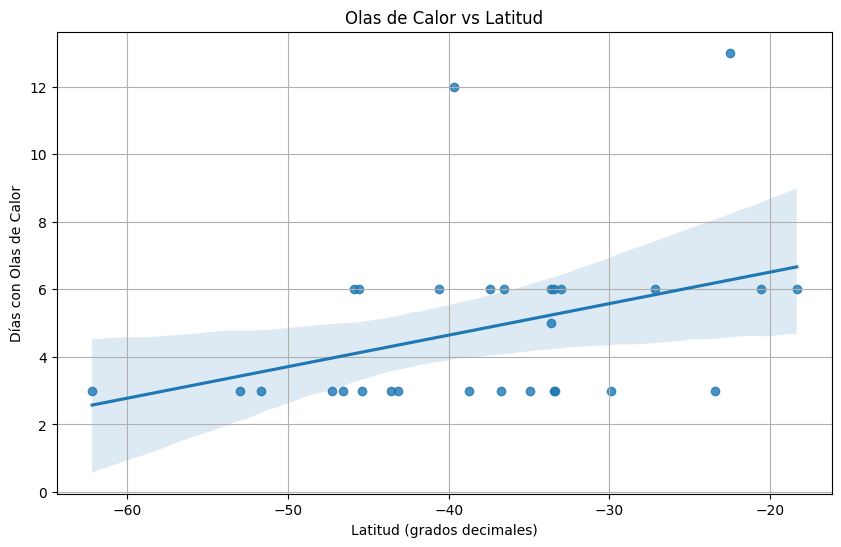

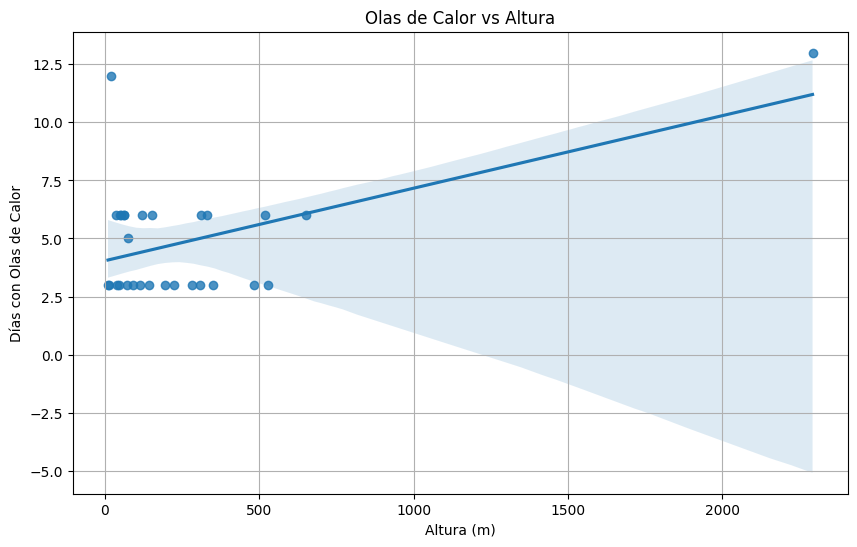

Tama√±o del dataset: (11765, 14)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular el total de d√≠as con olas de calor por estaci√≥n
dias_ola_calor = heat_wave_events_df_all.groupby('Nombre Estacion')['Duration'].sum().reset_index(name='Dias_Ola_Calor')

# 2. Obtener latitud y altura √∫nicas por estaci√≥n
info_estaciones = df[['Nombre Estacion', 'Latitud', 'Altura']].drop_duplicates('Nombre Estacion')

# 3. Unir ambas tablas
df_correlacion = dias_ola_calor.merge(info_estaciones, on='Nombre Estacion', how='left')

# 4. Funci√≥n para convertir latitud a grados decimales
def convertir_latitud(lat):
    try:
        partes = lat.replace('&deg', '').replace("'", '').replace("''", '').split()
        grados, minutos, segundos, direccion = float(partes[0]), float(partes[1]), float(partes[2]), partes[3]
        decimal = grados + minutos / 60 + segundos / 3600
        return -decimal if direccion == 'S' else decimal
    except:
        return np.nan

# 5. Aplicar la conversi√≥n
df_correlacion['Latitud_Decimal'] = df_correlacion['Latitud'].apply(convertir_latitud)

# 6. Calcular correlaciones de Pearson
corr_lat = df_correlacion['Dias_Ola_Calor'].corr(df_correlacion['Latitud_Decimal'])
corr_altura = df_correlacion['Dias_Ola_Calor'].corr(df_correlacion['Altura'])

print(f"Correlaci√≥n con la Latitud: {corr_lat:.3f}")
print(f"Correlaci√≥n con la Altura: {corr_altura:.3f}")

# 7. Graficar resultados
def graficar(x, y, titulo, xlabel):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=df_correlacion)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel('D√≠as con Olas de Calor')
    plt.grid(True)
    plt.show()

graficar('Latitud_Decimal', 'Dias_Ola_Calor', 'Olas de Calor vs Latitud', 'Latitud (grados decimales)')
graficar('Altura', 'Dias_Ola_Calor', 'Olas de Calor vs Altura', 'Altura (m)')
print("Tama√±o del dataset:", df.shape)  # (filas, columnas)

#4.- Tendencia anual (15 pts)

Para cada estaci√≥n, estime la **pendiente** (¬∞C/d√≠a) de `TMaxima` usando `numpy.polyfit` con `x = d√≠a del a√±o` y `y = TMaxima`.

- Reporte la pendiente y ordene las 10 estaciones con pendiente m√°s alta (calentamiento) y m√°s baja (enfriamiento).


In [15]:
import numpy as np
import pandas as pd

def calcular_tendencias(df):
    """Calcula la pendiente de la TMaxima a lo largo del a√±o para cada estaci√≥n."""

    # Asegurar que el √≠ndice sea de tipo datetime
    df.index = pd.to_datetime(df.index, errors='coerce')

    # A√±adir columna 'Dia_del_A√±o' si no existe
    if 'Dia_del_A√±o' not in df.columns:
        df['Dia_del_A√±o'] = df.index.dayofyear

    tendencias = {}

    for estacion, grupo in df.groupby('Nombre Estacion'):
        grupo = grupo.dropna(subset=['TMaxima'])

        if len(grupo) <= 1:
            print(f"‚ö†Ô∏è Estaci√≥n '{estacion}' no tiene suficientes datos para calcular tendencia.")
            tendencias[estacion] = np.nan
            continue

        x = grupo['Dia_del_A√±o']
        y = grupo['TMaxima']

        try:
            pendiente, _ = np.polyfit(x, y, 1)
            tendencias[estacion] = pendiente
        except np.linalg.LinAlgError:
            print(f"‚ùå Error num√©rico al ajustar tendencia para estaci√≥n: {estacion}")
            tendencias[estacion] = np.nan

    return pd.DataFrame(tendencias.items(), columns=['Estacion', 'Pendiente']).dropna(subset=['Pendiente'])


def mostrar_extremos(df_tendencias, top_n=10):
    """Muestra las estaciones con mayor calentamiento y enfriamiento."""
    print("üî∫ Estaciones con mayor tendencia de calentamiento (¬∞C/d√≠a):")
    display(df_tendencias.nlargest(top_n, 'Pendiente'))

    print("\nüîª Estaciones con mayor tendencia de enfriamiento (¬∞C/d√≠a):")
    display(df_tendencias.nsmallest(top_n, 'Pendiente'))


# --- Ejecuci√≥n del an√°lisis ---

df_tendencias = calcular_tendencias(df)
mostrar_extremos(df_tendencias)
print("Tama√±o del dataset:", df.shape)  # (filas, columnas)

üî∫ Estaciones con mayor tendencia de calentamiento (¬∞C/d√≠a):


/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: RankWarning: Polyfit may be poorly conditioned
  pendiente, _ = np.polyfit(x, y, 1)
/tmp/ipython-input-495121802.py:28: Rank

Estacion  Pendiente
12                 El Loa, Calama Ad.  11.923333
28            Quinta Normal, Santiago  11.857377
24       Mataveri  Isla de Pascua Ap.  11.845342
26                 Pudahuel Santiago   11.671721
14      Eulogio Sanchez, Tobalaba Ad.  11.455068
8               Chacalluta, Arica Ap.  11.096995
11          Diego Aracena Iquique Ap.  10.784563
17         General Freire, Curico Ad.  10.643562
23     Maria Dolores, Los Angeles Ad.  10.181630
10  Desierto de Atacama, Caldera  Ap.  10.070680


üîª Estaciones con mayor tendencia de enfriamiento (¬∞C/d√≠a):


Estacion  Pendiente
3   C.M.A. Eduardo Frei Montalva, Antartica   -0.485656
18  Guardia Marina Zanartu, Pto Williams Ad.   4.189881
4            Carlos Ibanez, Punta Arenas Ap.   4.824863
15            Fuentes Martinez, Porvenir Ad.   4.852146
27                          Puerto Aysen Ad.   5.300654
31     Teniente Gallardo, Puerto Natales Ad.   5.553005
1                              Balmaceda Ad.   6.193989
32             Teniente Vidal, Coyhaique Ad.   6.806967
21                         Lord Cochrane Ad.   6.876366
16                             Futaleufu Ad.   7.300870

Tama√±o del dataset: (11765, 15)


#5.- Visualizaciones (15 pts)

1. Para una estaci√≥n `Chacalluta, Arica Ap`, grafique series de `TMinima` y `TMaxima` a lo largo del a√±o.  
2. : Resumir TMaxima por mes con dispersi√≥n.
- Pasos:
    - Agrupa por mes y calcula mean y std de TMaxima.
    - Grafica barras de medias con barras de error (¬±SD).
3. Resaltar d√≠as extremadamente c√°lidos.
- Pasos:
    - Calcula umbral Percentil 99 de TMaxima para cada estaci√≥n.
    - Grafica serie de TMaxima y marca con puntos los ‚â• P99; agrega l√≠nea horizontal en P99.
4. En otra figura, cree un **boxplot** del `Rango` por mes para cada estaci√≥n de medici√≥n.


# Desarollo

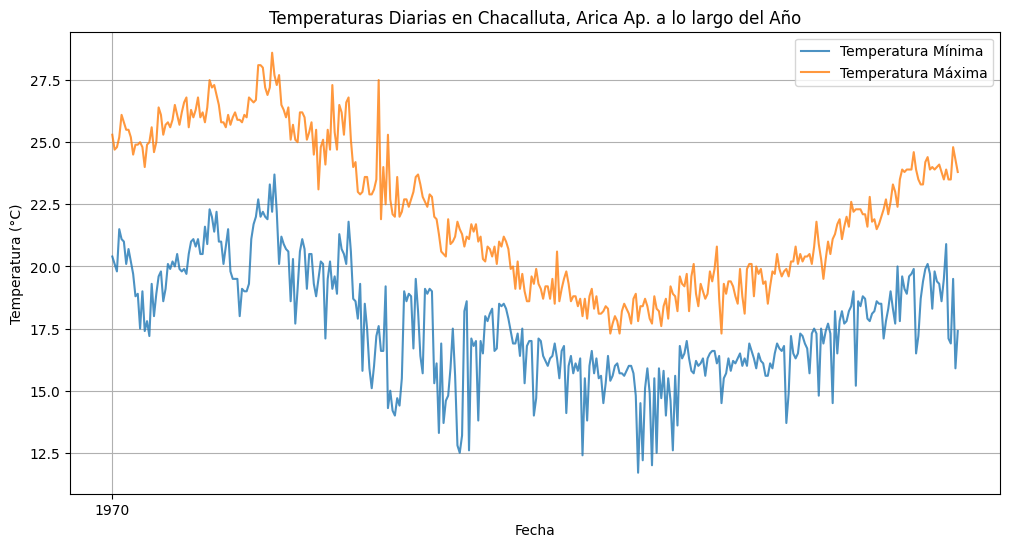

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Serie temporal de temperaturas (TMin y TMax)
# Estaci√≥n: Chacalluta, Arica Ap

estacion_seleccionada = 'Chacalluta, Arica Ap.'
df_estacion = df[df['Nombre Estacion'] == estacion_seleccionada].copy()

# Asegurar que el √≠ndice es de tipo datetime
df_estacion.index = pd.to_datetime(df_estacion.index)

plt.figure(figsize=(12, 6))
plt.plot(df_estacion.index, df_estacion['TMinima'], label='Temperatura M√≠nima', alpha=0.8)
plt.plot(df_estacion.index, df_estacion['TMaxima'], label='Temperatura M√°xima', alpha=0.8)
plt.title(f'Temperaturas Diarias en {estacion_seleccionada} a lo largo del A√±o')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (¬∞C)')
plt.legend()
plt.grid(True)
plt.show()

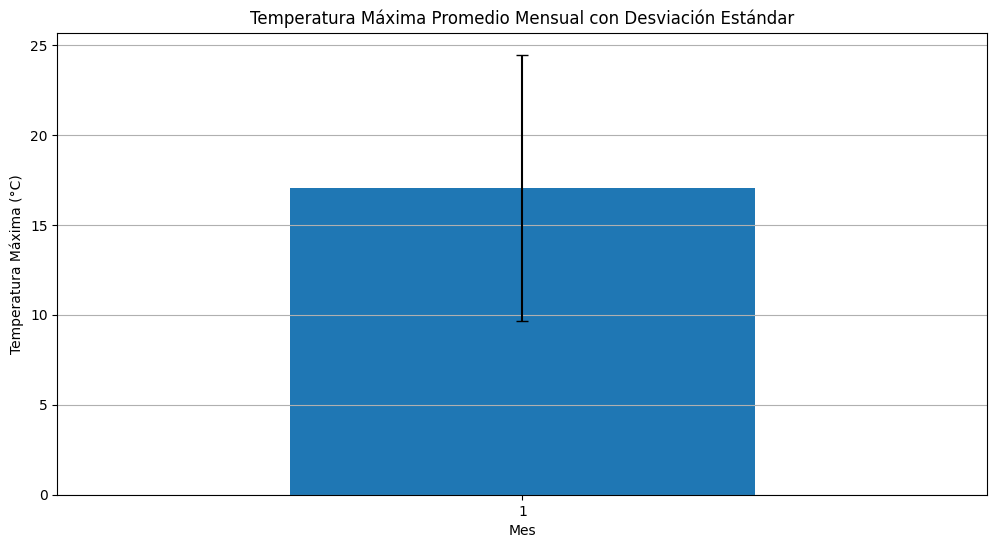

In [17]:
# 2. Resumir TMaxima por mes con dispersi√≥n (barras de medias con barras de error)

# Agrupar por mes y calcular la media y desviaci√≥n est√°ndar de TMaxima
tmax_monthly_summary = df.groupby(df.index.month)['TMaxima'].agg(['mean', 'std'])

# Graficar barras de medias con barras de error
plt.figure(figsize=(12, 6))
tmax_monthly_summary['mean'].plot(kind='bar', yerr=tmax_monthly_summary['std'], capsize=4)
plt.title('Temperatura M√°xima Promedio Mensual con Desviaci√≥n Est√°ndar')
plt.xlabel('Mes')
plt.ylabel('Temperatura M√°xima (¬∞C)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

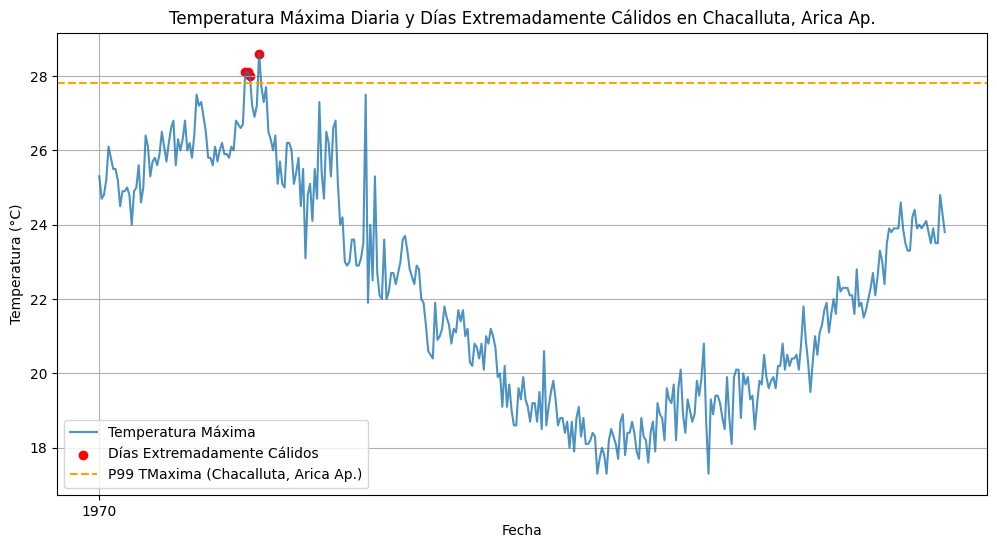

In [18]:
# 3. Resaltar d√≠as extremadamente c√°lidos

# Calcular el umbral del Percentil 99 de TMaxima para cada estaci√≥n
p99_tmax_estacion = df.groupby('Nombre Estacion')['TMaxima'].quantile(0.99)

# Mapear el P99 de vuelta al DataFrame original
df['P99_TMaxima'] = df['Nombre Estacion'].map(p99_tmax_estacion)

# Identificar los d√≠as extremadamente c√°lidos (TMaxima >= P99)
df['Is_Extremely_Hot'] = (df['TMaxima'] >= df['P99_TMaxima']).astype(int)

# Graficar serie de TMaxima y marcar los d√≠as extremadamente c√°lidos para una estaci√≥n de ejemplo
estacion_ejemplo = 'Chacalluta, Arica Ap.' # Usamos la misma estaci√≥n que en el primer gr√°fico
df_ejemplo = df[df['Nombre Estacion'] == estacion_ejemplo].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_ejemplo.index, df_ejemplo['TMaxima'], label='Temperatura M√°xima', alpha=0.8)

# Marcar los d√≠as extremadamente c√°lidos
extremely_hot_days = df_ejemplo[df_ejemplo['Is_Extremely_Hot'] == 1]
plt.scatter(extremely_hot_days.index, extremely_hot_days['TMaxima'], color='red', label='D√≠as Extremadamente C√°lidos')

# Agregar l√≠nea horizontal en el P99 de esa estaci√≥n
p99_estacion_ejemplo = p99_tmax_estacion[estacion_ejemplo]
plt.axhline(y=p99_estacion_ejemplo, color='orange', linestyle='--', label=f'P99 TMaxima ({estacion_ejemplo})')

plt.title(f'Temperatura M√°xima Diaria y D√≠as Extremadamente C√°lidos en {estacion_ejemplo}')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (¬∞C)')
plt.legend()
plt.grid(True)
plt.show()

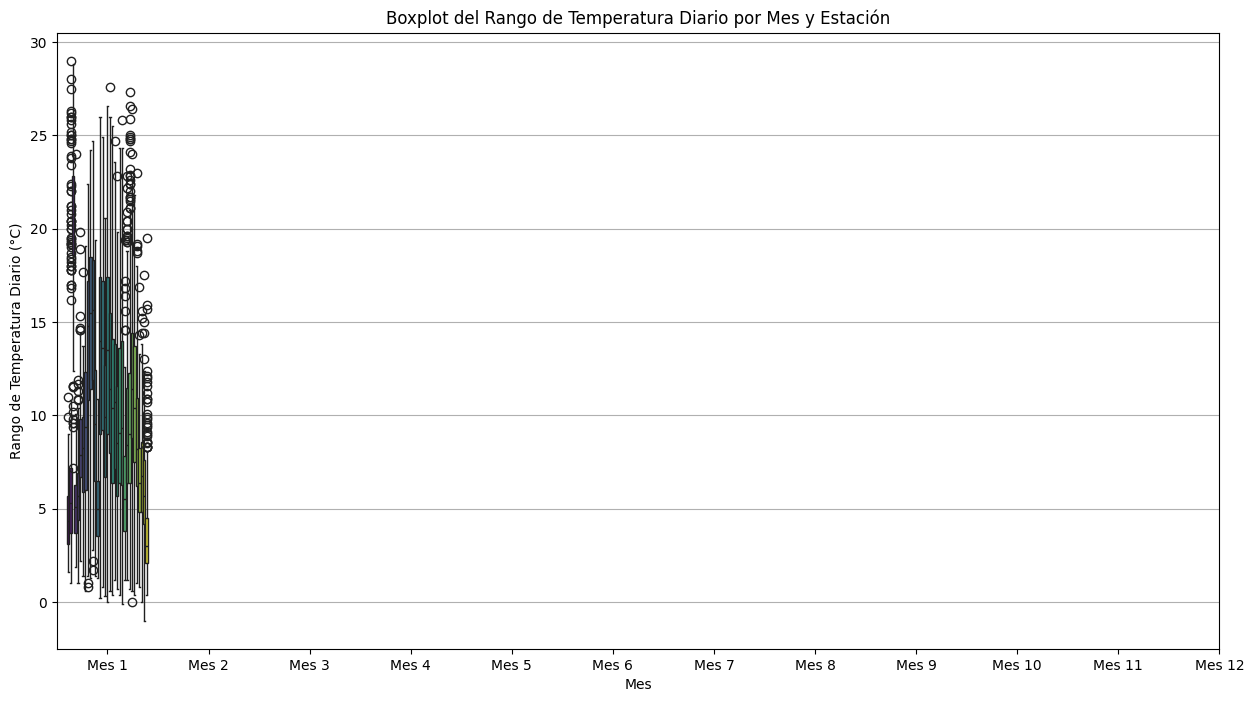

In [19]:

# 4. Crear un boxplot del Rango por mes para cada estaci√≥n de medici√≥n
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(x=df.index.month, y='RangoDiario', hue='Nombre Estacion', data=df, palette='viridis', legend=False)
plt.title('Boxplot del Rango de Temperatura Diario por Mes y Estaci√≥n')
plt.xlabel('Mes')
plt.ylabel('Rango de Temperatura Diario (¬∞C)')
plt.xticks(ticks=range(12), labels=[f'Mes {m+1}' for m in range(12)])
plt.grid(axis='y')
plt.show()